In [113]:
from keras.datasets import mnist

# **Visualizing**

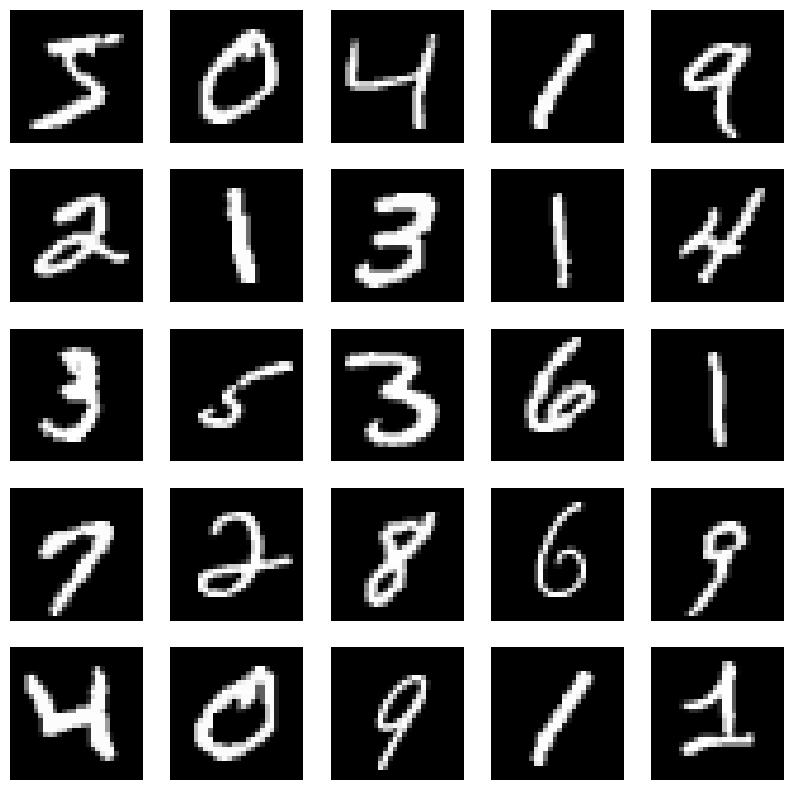

In [114]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Visualize the first few images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
plt.show()

In [115]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_test.shape

(10000, 28, 28)

In [116]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

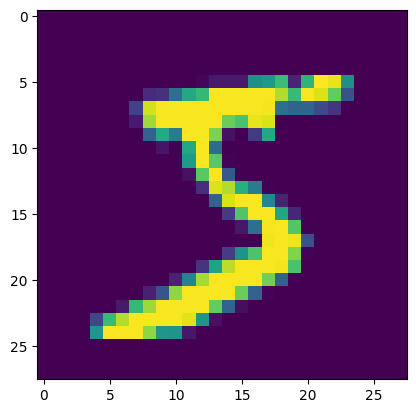

In [117]:
plt.imshow(X_train[0])

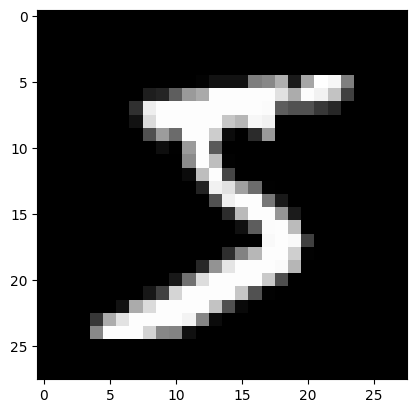

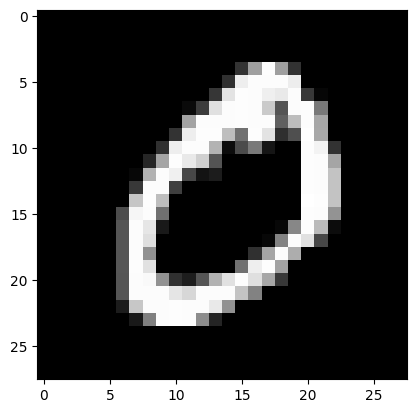

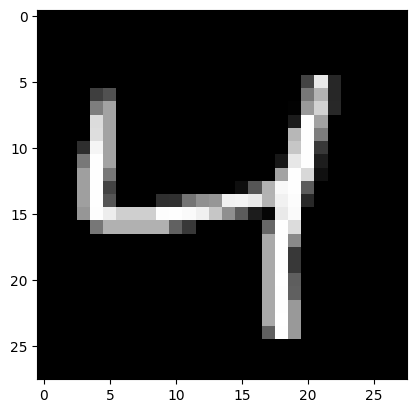

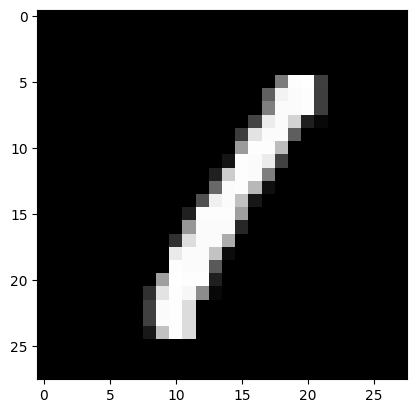

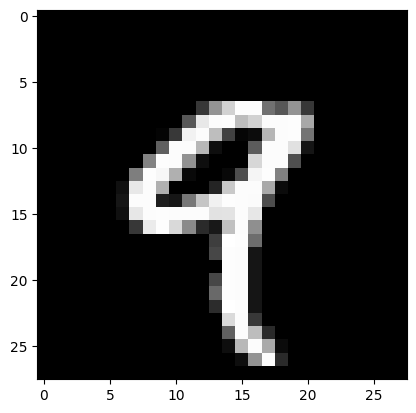

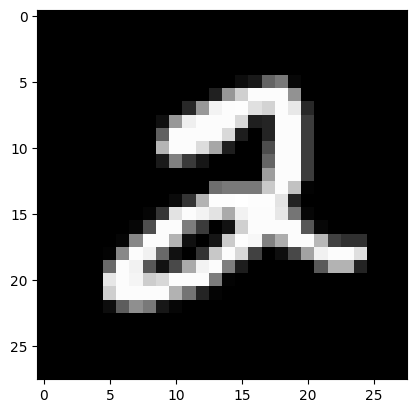

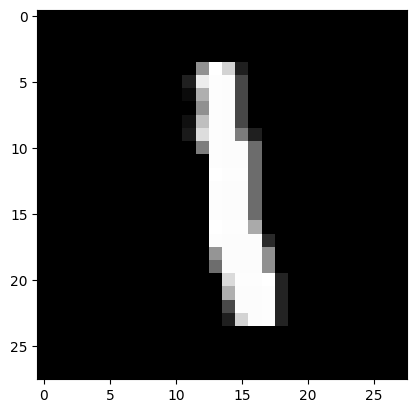

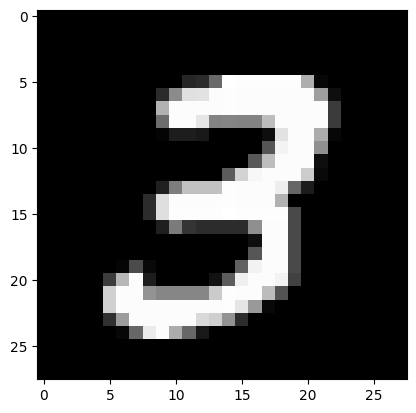

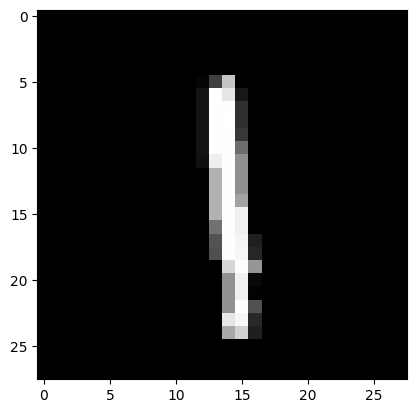

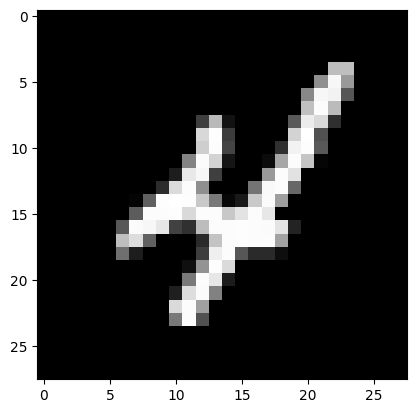

In [118]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.imshow(X_train[i], cmap='gray')
    plt.show()

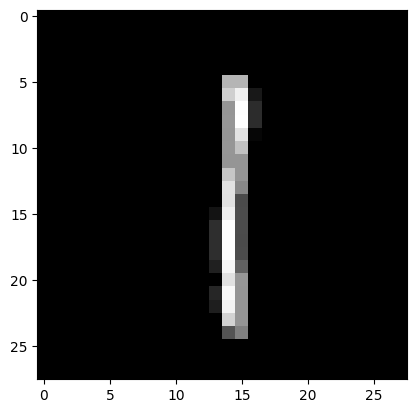

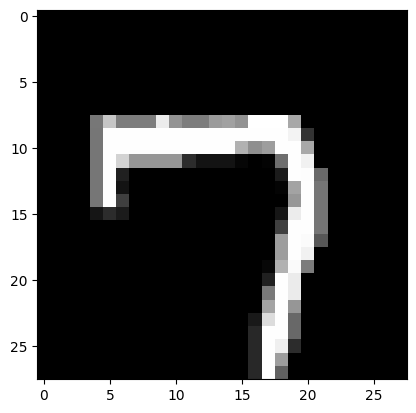

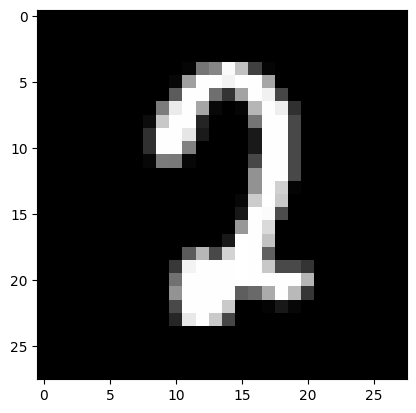

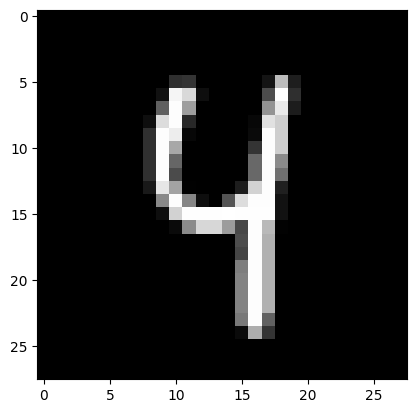

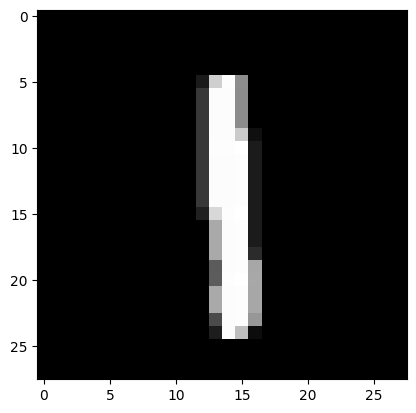

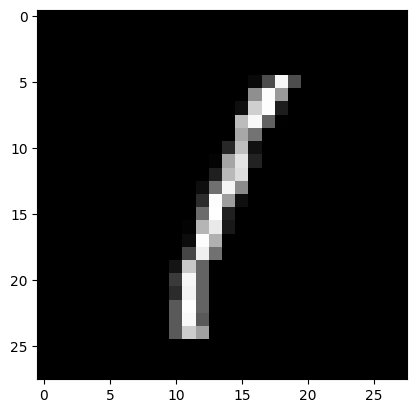

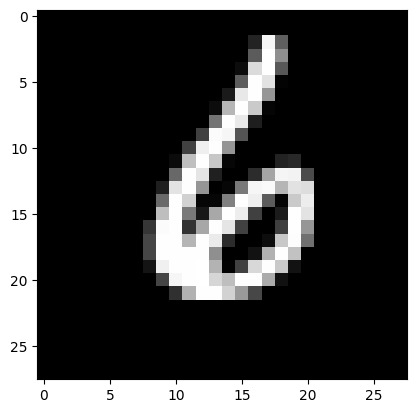

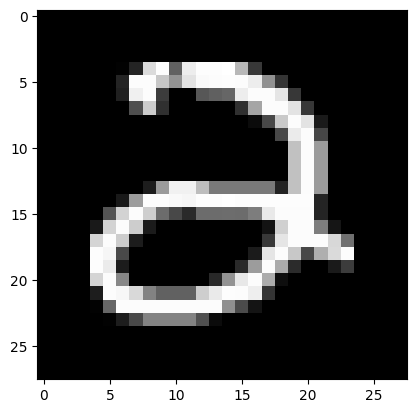

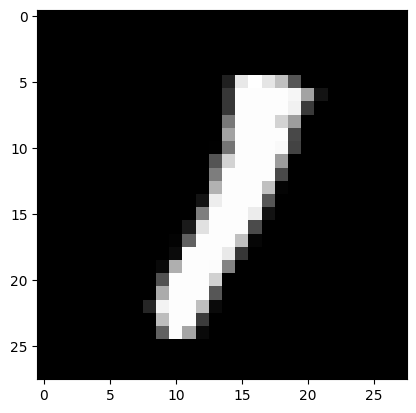

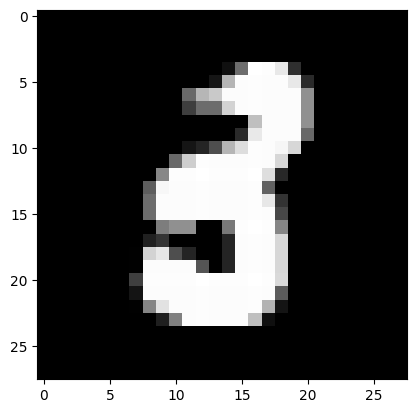

In [119]:
import numpy as np

indices = np.random.choice(len(X_train), 10)
for i in indices:
    plt.imshow(X_train[i], cmap='gray')
    plt.show()

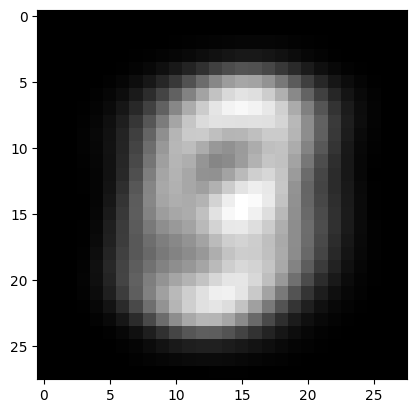

In [120]:
mean_image = np.mean(X_train, axis=0)
plt.imshow(mean_image, cmap='gray')
plt.show()

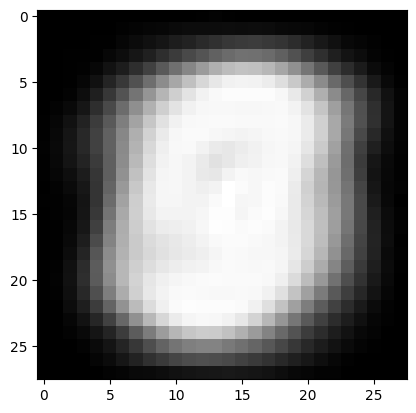

In [121]:
std_image = np.std(X_train, axis=0)
plt.imshow(std_image, cmap='gray')
plt.show()

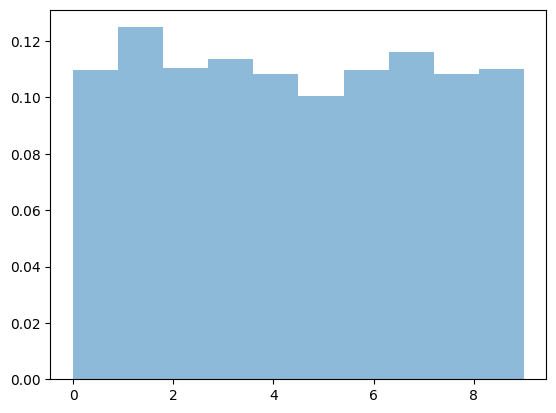

In [122]:
plt.hist(y_train, bins=10, density=True, alpha=0.5)
plt.show()

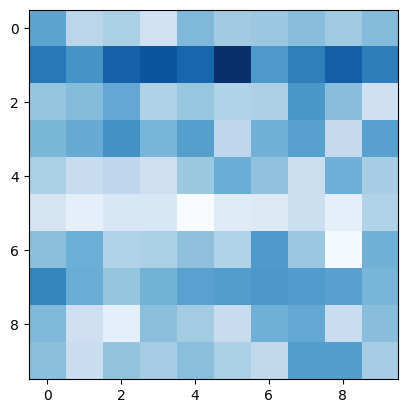

In [123]:
from sklearn.metrics import confusion_matrix

y_pred = np.random.randint(10, size=len(X_train))
confusion_mat = confusion_matrix(y_train, y_pred)

plt.imshow(confusion_mat, cmap='Blues')
plt.show()

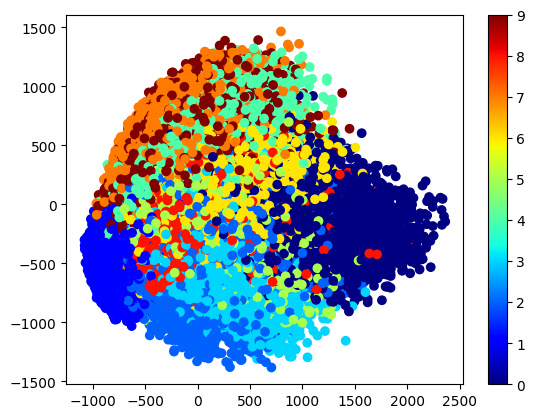

In [124]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_train.reshape(len(X_train), -1))

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y_train, cmap='jet')
plt.colorbar()
plt.show()

# **Preprocessing**

In [125]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [126]:
train_images = train_images.reshape((60000, 784))
test_images = test_images.reshape((10000, 784))

In [127]:
import keras
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

In [128]:
from skimage.filters import gaussian
# Apply Gaussian filtering for noise reduction
train_images = gaussian(train_images, sigma=1)
test_images = gaussian(test_images, sigma=1)

In [129]:
from skimage.filters import threshold_otsu
# Apply Otsu thresholding for image segmentation
thresh = threshold_otsu(train_images)
train_images = train_images > thresh
thresh = threshold_otsu(test_images)
test_images = test_images > thresh

In [130]:
from skimage.feature import canny
# Apply Canny edge detection for feature extraction
train_images = canny(train_images)
test_images = canny(test_images)

In [131]:
from sklearn.decomposition import PCA
# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)
train_images = pca.fit_transform(train_images)
test_images = pca.transform(test_images)

# Print the shape of the preprocessed data
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 50)
Train labels shape: (60000, 10)
Test images shape: (10000, 50)
Test labels shape: (10000, 10)


In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


# Reshape the images for the logistic regression model
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

# Create the logistic regression model
model = LogisticRegression(max_iter=100)
model.fit(train_images, train_labels)

# Make predictions
train_predictions = model.predict(train_images)
test_predictions = model.predict(test_images)

# Evaluate the model
train_accuracy = accuracy_score(train_labels, train_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: 0.9339166666666666
Test accuracy: 0.9255


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


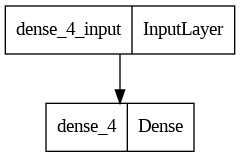

In [133]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import numpy as np
from keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape the input data
train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)

# Convert the true labels to one-hot encoded vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the model architecture
model = Sequential()
model.add(Dense(10, input_shape=(784,), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

#plotting the model
plot_model(model)

In [134]:
# Train the model with validation and early stopping
history = model.fit(train_images, train_labels, epochs=100, batch_size=32, validation_data=(test_images, test_labels), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 9.3444 - accuracy: 0.8425 - val_loss: 5.2028 - val_accuracy: 0.8948
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 6.0440 - accuracy: 0.8798 - val_loss: 5.4344 - val_accuracy: 0.8952
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 5.7623 - accuracy: 0.8835 - val_loss: 5.8876 - val_accuracy: 0.8755
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4775 - accuracy: 0.8870 - val_loss: 5.7783 - val_accuracy: 0.8830
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 5.4121 - accuracy: 0.8854 - val_loss: 6.5719 - val_accuracy: 0.8788
Epoch 6/100
313/313 [==============================] - 0s 1ms/step - loss: 5.6266 - accuracy: 0.8775
Test loss: 5.626582145690918
Test accuracy: 0.8774999976158142


In [137]:
# Reshape the input data
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Evaluate your model
score = model.evaluate(x=X_test_reshaped, y=y_test_one_hot, verbose=0)
print("Test score:", score[0])
print("Test accuracy:", score[1])

Test score: 5.626582145690918
Test accuracy: 0.8774999976158142


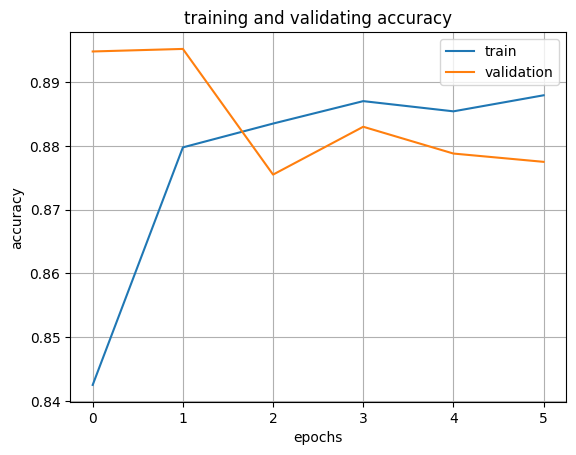

In [138]:
import matplotlib.pyplot as plt
#plot training accuracy and validation accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("training and validating accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train","validation"])
plt.grid()
plt.show()

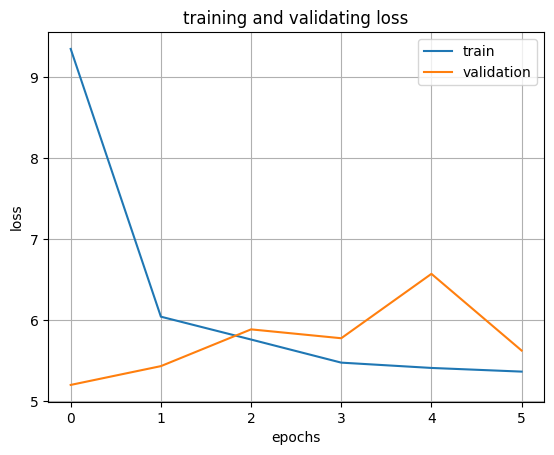

In [139]:
#plot training loss or validation loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("training and validating loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train","validation"])
plt.grid()
plt.show()

In [140]:
print(test_labels.shape)
print(y_pred.shape)

(10000, 10)
(60000,)


In [141]:
y_pred=model.predict(test_images)
y_pred[:10]

313/313 [==============================] - 0s 864us/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.8684464e-27,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 1.5305774e-35, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.9999994e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 5.9957271e-28],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.06

In [142]:
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Assuming you have y_test and y_pred arrays

# Convert probabilities to predicted labels
y_pred_labels = np.argmax(y_pred, axis=1)

confusion_mat = confusion_matrix(test_labels, y_pred_labels)
classification_rep = classification_report(test_labels, y_pred_labels)

print("Confusion Matrix:")
print(confusion_mat)

print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[ 947    0    4   11    1    7    3    4    3    0]
 [   0 1101    2    3    0    3    4    2   20    0]
 [   6   21  870   46    6   12   22   17   27    5]
 [   1    2   13  890    1   61    4   13   17    8]
 [   5    2    3    3  832    0   25   46    9   57]
 [   9    3    4   32    5  800   11   11   11    6]
 [   9    2    3    3    3   40  893    1    4    0]
 [   0    8   10    8    0    0    1  973    4   24]
 [   6    7    5   60    8  133   13   21  707   14]
 [   8    5    0   11   22   14    0  175   12  762]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       980
           1       0.96      0.97      0.96      1135
           2       0.95      0.84      0.89      1032
           3       0.83      0.88      0.86      1010
           4       0.95      0.85      0.89       982
           5       0.75      0.90      0.82       892
           6       0.91      0.93      0.92     

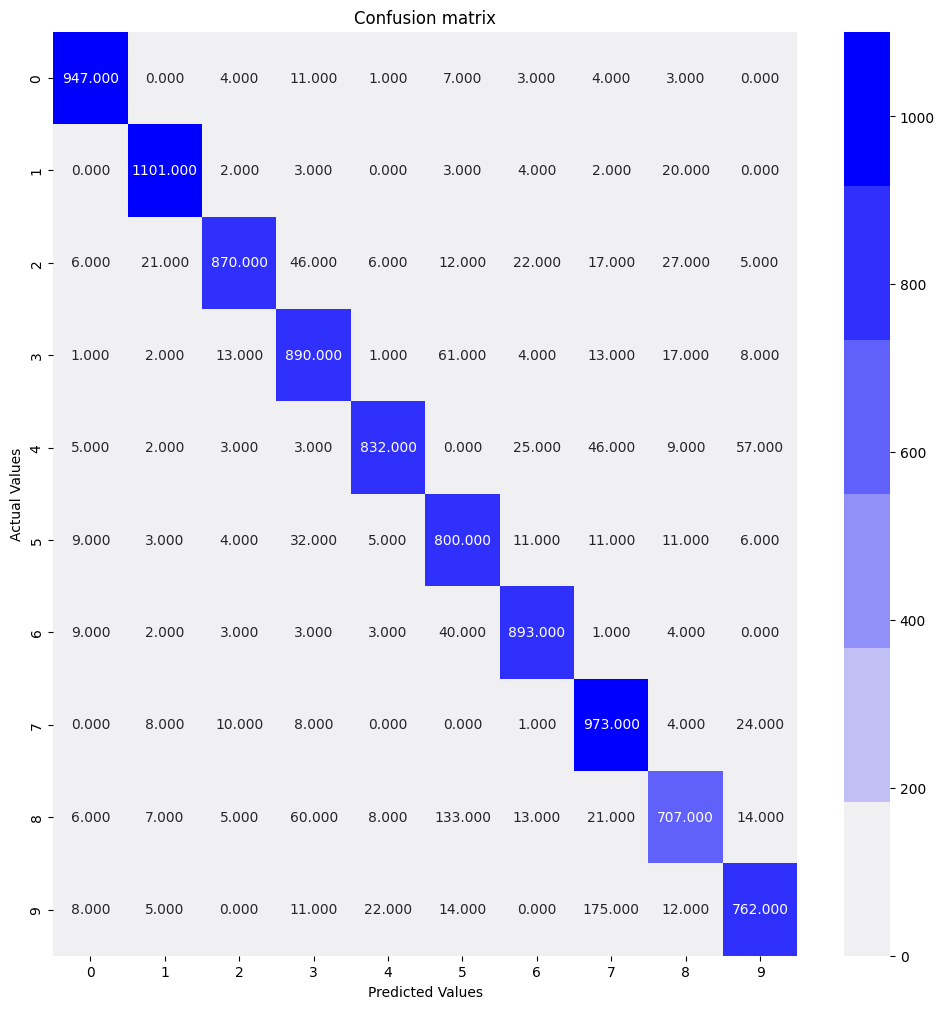


----------------------------------------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       980
           1       0.96      0.97      0.96      1135
           2       0.95      0.84      0.89      1032
           3       0.83      0.88      0.86      1010
           4       0.95      0.85      0.89       982
           5       0.75      0.90      0.82       892
           6       0.91      0.93      0.92       958
           7       0.77      0.95      0.85      1028
           8       0.87      0.73      0.79       974
           9       0.87      0.76      0.81      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Accuracy Score: 87.75


In [143]:
def plot_confusion_matrix(y_test, y_predict):
    y_test = np.array(y_test)
    y_predict = np.array(y_predict)

    if y_test.ndim > 1:
        y_test = np.argmax(y_test, axis=1)
    if y_predict.ndim > 1:
        y_predict = np.argmax(y_predict, axis=1)

    cm = confusion_matrix(y_test, y_predict)
    labels = list(np.unique(y_test))
    cmap = sns.light_palette("blue")
    plt.figure(figsize=(12, 12))
    sns.heatmap(cm, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title("Confusion matrix")
    plt.show()

    print()
    print('-' * 100)
    print("Classification Report: \n", classification_report(y_test, y_predict))
    print('Accuracy Score:', accuracy_score(y_test, y_predict) * 100)

plot_confusion_matrix(y_test, y_pred)

In [144]:
import tensorflow as tf
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [213]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

# Define the input and output dimensions
input_dims = X_train.shape[1]
output_dims = 10

# Defining the sequential model
model = Sequential()

# Add the 1st dense layer to the sequential model with L2 regularization
model.add(Dense(512, activation="sigmoid", input_shape=(input_dims,), name="Hidden_layer_1"))

# Add the 2nd dense layer to the sequential model with L2 regularization
model.add(Dense(128, activation="sigmoid", name="Hidden_layer_2"))

# # Add dropout regularization after the 2nd dense layer
# model.add(Dropout(0.05))

# Add the 3rd dense layer to the sequential model with L2 regularization
model.add(Dense(32, activation="sigmoid", name="Hidden_layer_3"))

# Add the output layer
model.add(Dense(output_dims, activation="softmax", name="output_layer"))

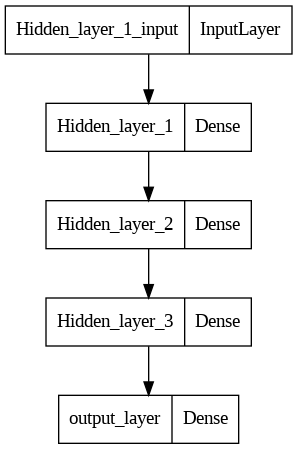

In [214]:
#plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [215]:
from tensorflow.keras.optimizers import RMSprop
#define the optimizer
optimizer=RMSprop(0.001)

In [216]:
#define the batch_size and no. of epochs
batch_size=128 #batch size should always be in 2^n where n=1,2,3,4....
num_epochs=20

#fit a neural network or train a neural_network
from keras.utils import to_categorical

# Assuming y_train is a 1D array of integer labels
y_train_one_hot = to_categorical(y_train, num_classes=output_dims)

# Now y_train_one_hot should have shape (batch_size, output_dims)

# Compile your model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your model
history = model.fit(X_train, y_train_one_hot, validation_split=0.2, epochs=num_epochs, batch_size=batch_size, verbose=1)

Epoch 1/20
375/375 [==============================] - 4s 9ms/step - loss: 0.8707 - accuracy: 0.8241 - val_loss: 0.3632 - val_accuracy: 0.9220
Epoch 2/20
375/375 [==============================] - 3s 8ms/step - loss: 0.3188 - accuracy: 0.9217 - val_loss: 0.2940 - val_accuracy: 0.9215
Epoch 3/20
375/375 [==============================] - 3s 8ms/step - loss: 0.2675 - accuracy: 0.9254 - val_loss: 0.2492 - val_accuracy: 0.9266
Epoch 4/20
375/375 [==============================] - 3s 8ms/step - loss: 0.2384 - accuracy: 0.9314 - val_loss: 0.2164 - val_accuracy: 0.9363
Epoch 5/20
375/375 [==============================] - 3s 9ms/step - loss: 0.2162 - accuracy: 0.9362 - val_loss: 0.2209 - val_accuracy: 0.9342
Epoch 6/20
375/375 [==============================] - 3s 8ms/step - loss: 0.2112 - accuracy: 0.9360 - val_loss: 0.2034 - val_accuracy: 0.9392
Epoch 7/20
375/375 [==============================] - 3s 8ms/step - loss: 0.2049 - accuracy: 0.9371 - val_loss: 0.1884 - val_accuracy: 0.9422
Epoch 

In [217]:
from keras.utils import to_categorical

# Assuming y_test is a 1D array of integer labels
y_test_one_hot = to_categorical(y_test, num_classes=output_dims)

# Now y_test_one_hot should have shape (batch_size, output_dims)

# Evaluate your model
score = model.evaluate(x=X_test, y=y_test_one_hot, verbose=0)
print("Test score:", score[0])
print("Test accuracy:", score[-1])

Test score: 0.1471375674009323
Test accuracy: 0.955299973487854


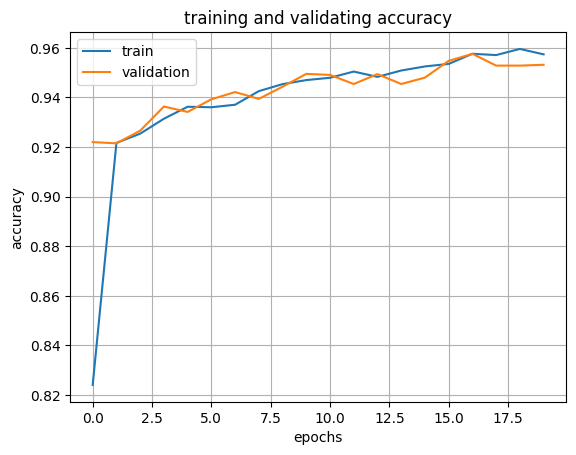

In [218]:
import matplotlib.pyplot as plt
#plot training accuracy and validation accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("training and validating accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train","validation"])
plt.grid()
plt.show()

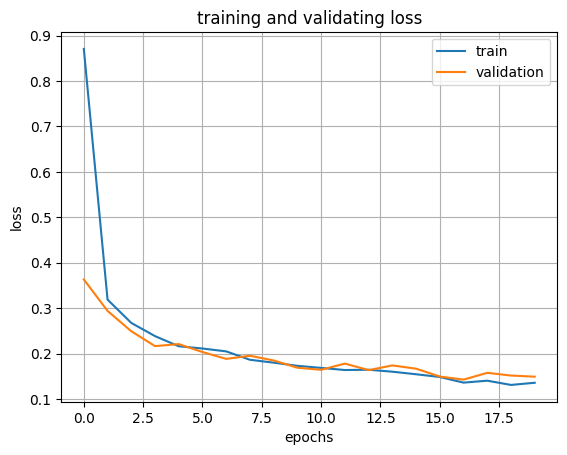

In [219]:
#plot training loss or validation loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("training and validating loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train","validation"])
plt.grid()
plt.show()

In [220]:
y_pred=model.predict(X_test)
y_pred[:10]

313/313 [==============================] - 1s 2ms/step


array([[1.95386874e-05, 4.87114194e-05, 4.59428353e-04, 7.71411171e-04,
        3.95263742e-05, 2.39937654e-05, 5.06806508e-09, 9.97335851e-01,
        6.22398693e-06, 1.29526120e-03],
       [3.91037793e-05, 8.20565037e-05, 9.99472320e-01, 1.92910331e-04,
        2.49275286e-06, 9.13763688e-06, 2.91308825e-05, 2.21517184e-05,
        1.48884283e-04, 1.79821620e-06],
       [6.63102628e-06, 9.97323632e-01, 5.64685266e-04, 3.11938522e-04,
        6.07130060e-05, 1.02901824e-04, 7.93553540e-04, 3.63622064e-04,
        4.62254771e-04, 9.91799061e-06],
       [9.95376885e-01, 1.16942219e-05, 8.87894654e-04, 1.90580060e-04,
        3.04997011e-05, 6.60635415e-04, 1.62973767e-03, 4.66845726e-04,
        7.76860179e-05, 6.67530228e-04],
       [1.12705333e-04, 3.21405641e-05, 1.00936915e-03, 1.04139013e-04,
        9.61560071e-01, 2.38856956e-04, 3.06132075e-04, 1.05759047e-03,
        5.70127449e-04, 3.50088999e-02],
       [4.63333663e-06, 9.96444225e-01, 9.87042004e-05, 7.38588395e-04,
   

In [221]:
y_pred=np.array([np.argmax(pred)for pred in y_pred])
y_pred[0:10],y_test[0:10]

(array([7, 2, 1, 0, 4, 1, 4, 9, 4, 9]),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

(10000,)
(10000,)


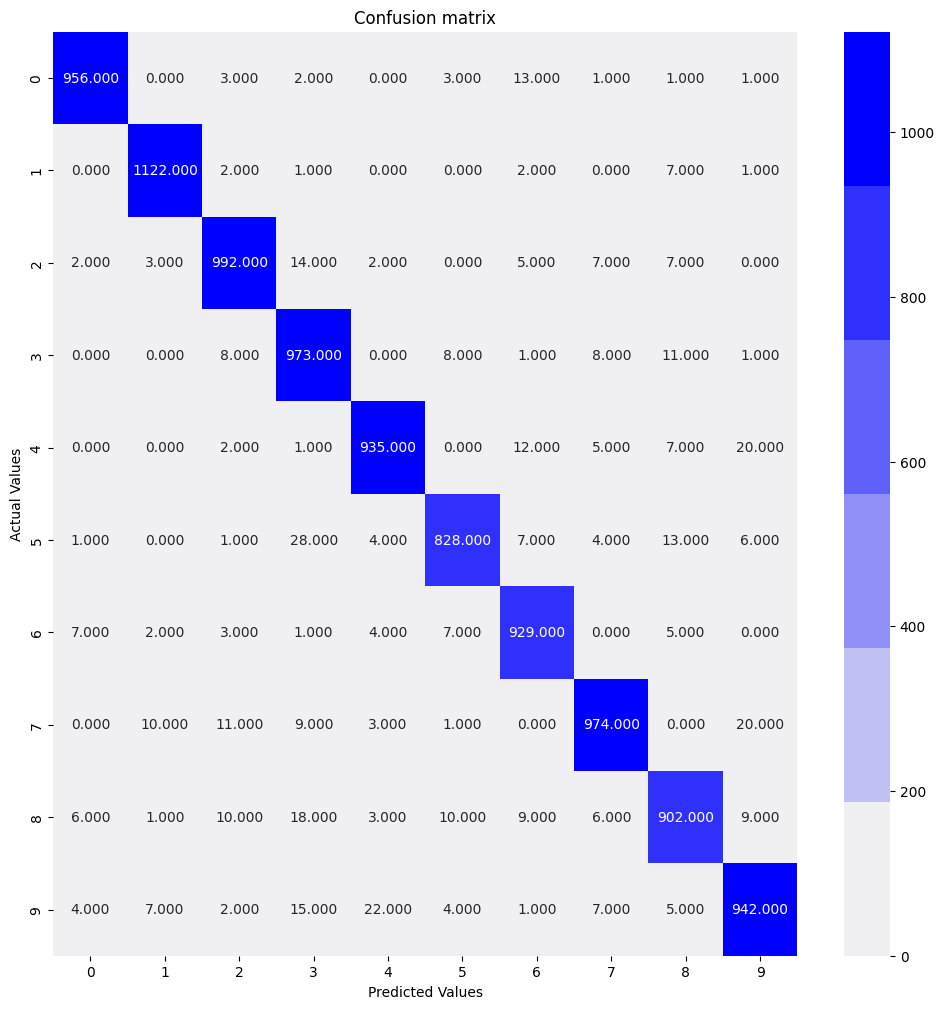


----------------------------------------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.92      0.96      0.94      1010
           4       0.96      0.95      0.96       982
           5       0.96      0.93      0.94       892
           6       0.95      0.97      0.96       958
           7       0.96      0.95      0.95      1028
           8       0.94      0.93      0.93       974
           9       0.94      0.93      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.95      0.95     10000
weighted avg       0.96      0.96      0.96     10000

Accuracy Score: 95.53


In [222]:
# Import libraries for plotting Confusion Matrix and Classification Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# This function plots the confusion matrices given y_i, Y_i_hat.
def plot_confusion_matrix(y_test, y_predict):
    print(y_test.shape)
    print(y_predict.shape)
    cm = confusion_matrix(y_test, y_predict)
    labels = list(np.unique(y_test))

    # Color Map
    cmap = sns.light_palette("blue")

    # Plot Confusion Matrix
    plt.figure(figsize=(12, 12))
    sns.heatmap(cm, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title("Confusion matrix")
    plt.show()

    print()
    print('-' * 100)
    print("Classification Report: \n", classification_report(y_test, y_predict))
    print('Accuracy Score:', accuracy_score(y_test, y_predict) * 100)

# Example usage:
# Assuming you have y_test and y_predict
# plot_confusion_matrix(y_test, y_predict)


plot_confusion_matrix(y_test, y_pred)